In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import np_utils

In [ ]:
dataset = pd.read_csv('heart.csv')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((272, 10), (272,), (31, 10), (31,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X, y, epochs=60, batch_size=32)

Epoch 1/60
10/10 [==============================] - 1s 2ms/step - loss: 12.7946 - accuracy: 0.5347
Epoch 2/60
10/10 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.3168
Epoch 3/60
10/10 [==============================] - 0s 2ms/step - loss: 7.9707 - accuracy: 0.3432
Epoch 4/60
10/10 [==============================] - 0s 2ms/step - loss: 7.1420 - accuracy: 0.3333
Epoch 5/60
10/10 [==============================] - 0s 2ms/step - loss: 6.7728 - accuracy: 0.3498
Epoch 6/60
10/10 [==============================] - 0s 2ms/step - loss: 6.3729 - accuracy: 0.3399
Epoch 7/60
10/10 [==============================] - 0s 2ms/step - loss: 6.0516 - accuracy: 0.3267
Epoch 8/60
10/10 [==============================] - 0s 2ms/step - loss: 5.7373 - accuracy: 0.3333
Epoch 9/60
10/10 [==============================] - 0s 2ms/step - loss: 5.4280 - accuracy: 0.3399
Epoch 10/60
10/10 [==============================] - 0s 2ms/step - loss: 5.1813 - accuracy: 0.3432
Epoch 11/60
10/10 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

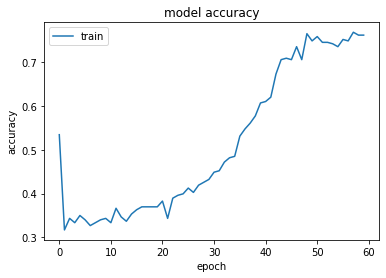

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

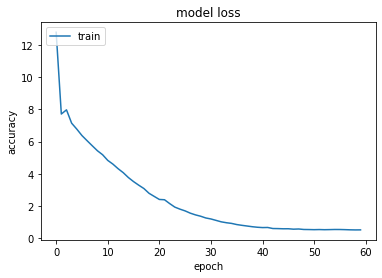

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
predictions = (model.predict(X) > 0.5).astype(int)
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0] => 0 (expected 1)
[130.0, 250.0, 0.0, 1.0, 187.0, 0.0, 3.5, 0.0, 0.0, 2.0] => 1 (expected 1)
[130.0, 204.0, 0.0, 0.0, 172.0, 0.0, 1.4, 2.0, 0.0, 2.0] => 1 (expected 1)
[120.0, 236.0, 0.0, 1.0, 178.0, 0.0, 0.8, 2.0, 0.0, 2.0] => 1 (expected 1)
[120.0, 354.0, 0.0, 1.0, 163.0, 1.0, 0.6, 2.0, 0.0, 2.0] => 1 (expected 1)


In [ ]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

10/10 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7657
Accuracy: 76.57


In [ ]:
y_pred = model.predict(X_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 2 15]
 [ 0 14]]


0.5161290322580645

In [ ]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
conf_misclassification = 1- conf_accuracy
conf_sensitivity = (TP / float(TP + FN))
conf_specificity = (TN / float(TN + FP))
conf_precision = (TN / float(TN + FP))
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 14
True Negatives: 2
False Positives: 15
False Negatives: 0
--------------------------------------------------
Accuracy: 0.52
Mis-Classification: 0.48
Sensitivity: 1.0
Specificity: 0.12
Precision: 0.12
f_1 Score: 0.21
